- 상단 볼린저 밴드 = 중간볼린저 밴드 + 2 * 표준편차
- 중간 볼린저 밴드 = 종가의 20일 이동평균
- 하단 볼린저 밴드 = 중간볼린저 밴드 - 2 * 표준편차

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [3]:
bitcoin = fdr.DataReader('BTC/KRW', '2020')
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,21442786101341
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,24073835152756
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,32774051275895
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,21503438108393
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,22998351377088


In [4]:
bitcoin['MA20'] = bitcoin['Close'].rolling(20, min_periods = 1).mean()

In [5]:
# 상단 볼린저 밴드 = 중간볼린저 밴드 + 2 * 표준편차 -> upper
# 하단 볼린저 밴드 = 중간볼린저 밴드 - 2 * 표준편차 -> lower

# .std()
# bitcoin['MA20'] + bitcoin['Close'].std() * 2

In [6]:
bitcoin['std'] = bitcoin['Close'].rolling(20, min_periods = 1).std()
bitcoin['upper'] = bitcoin['MA20'] + bitcoin['std'] * 2
bitcoin['lower'] = bitcoin['MA20'] - bitcoin['std'] * 2

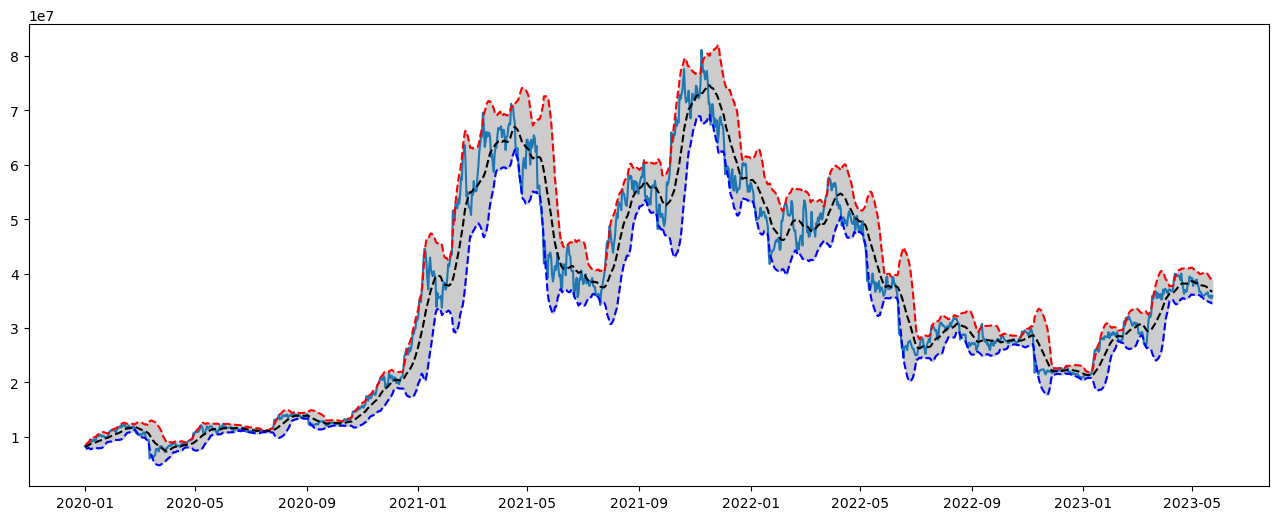

In [7]:
plt.figure(figsize = (16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

In [8]:
bitcoin['MA20'].std()

18471335.690691844

In [9]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower
Date,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,21442786101341,8315985.50,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,24073835152756,8200065.00,163936.343257,8.527938e+06,7.872192e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,32774051275895,8321079.00,239521.871461,8.800123e+06,7.842035e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,21503438108393,8400756.25,252271.694691,8.905300e+06,7.896213e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,22998351377088,8448842.60,243499.982009,8.935843e+06,7.961843e+06


<Axes: xlabel='Date'>

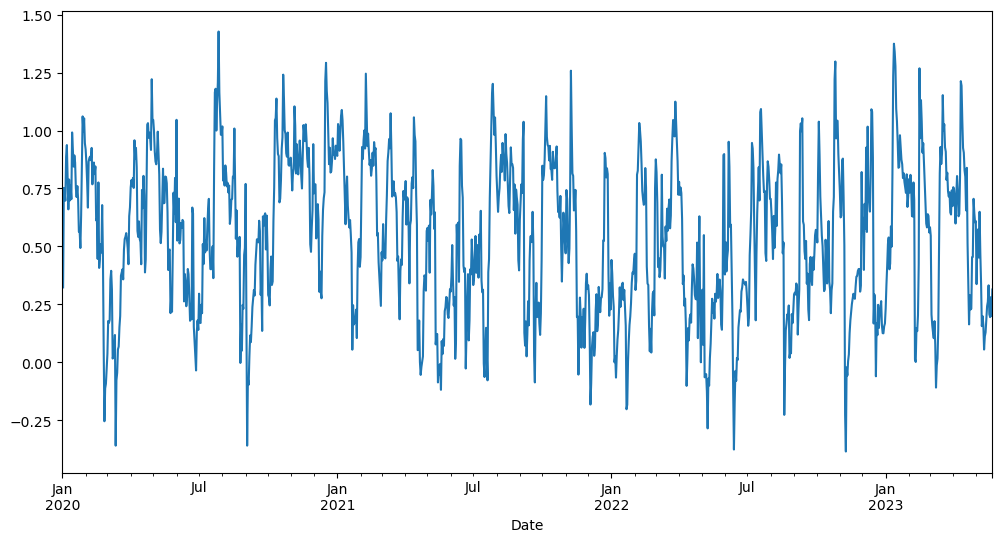

In [10]:
bitcoin['%b'] = (bitcoin['Close'] - bitcoin['lower']) / (bitcoin['upper'] - bitcoin['lower'])
bitcoin['%b'].plot(figsize = (12,6))

<Axes: xlabel='Date'>

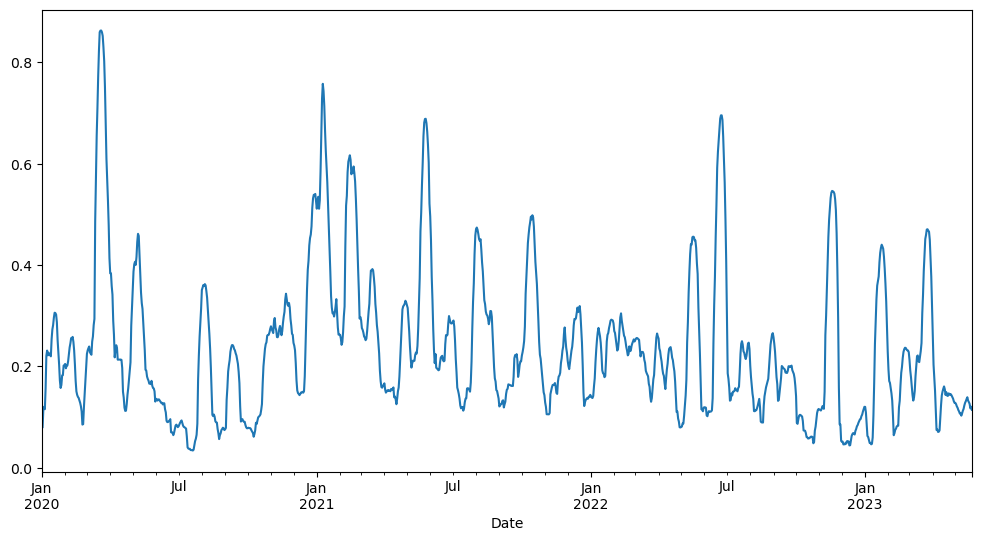

In [11]:
bitcoin['bandwidth'] = (bitcoin['upper'] - bitcoin['lower']) / bitcoin['MA20']
bitcoin['bandwidth'].plot(figsize = (12,6))

In [12]:
# bandwidth가 크다 -> 변동성이 크다.
# bandwidth가 작다 -> 변동성이 작다.
# (변동성이 커졌다 -> 작아졌다.) -> 추세가 바뀌었다.

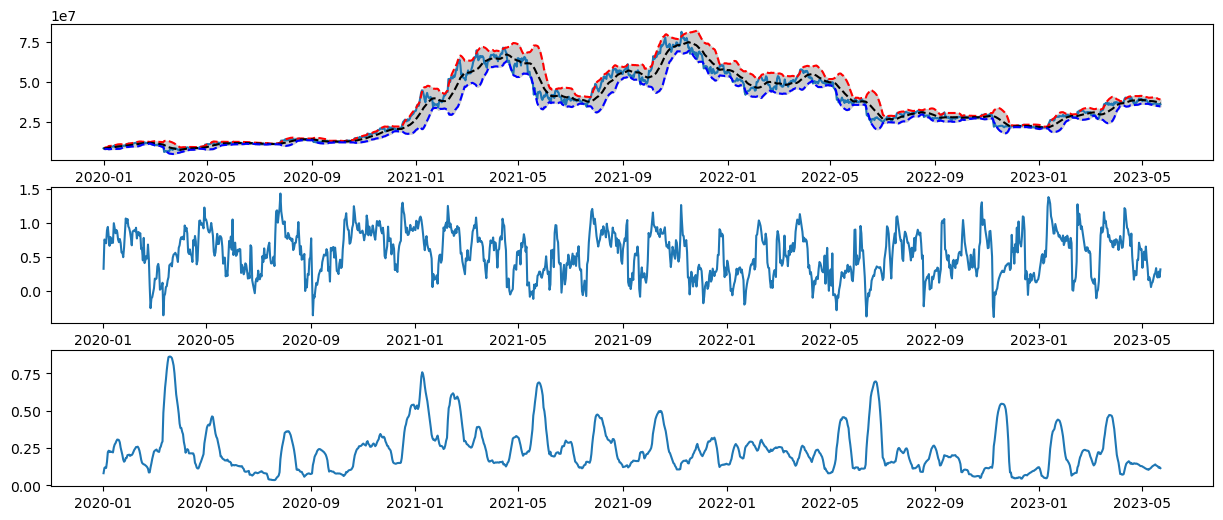

In [13]:
plt.figure(figsize = (15,6))
plt.subplot(3,1,1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

plt.subplot(3,1,2)
plt.plot(bitcoin.index, bitcoin['%b'])

plt.subplot(3,1,3)
plt.plot(bitcoin.index, bitcoin['bandwidth'])

In [14]:
# 볼린저 밴드, %b, bandwidth를 활용하여 매수매도 의견 내기

In [15]:
buy_cond1 = bitcoin['%b'] < 0.288838
sell_cond1 = bitcoin['%b'] < 0.80

In [16]:
BUY_DATE = bitcoin[buy_cond1].index
SELL_DATE = bitcoin[sell_cond1].index

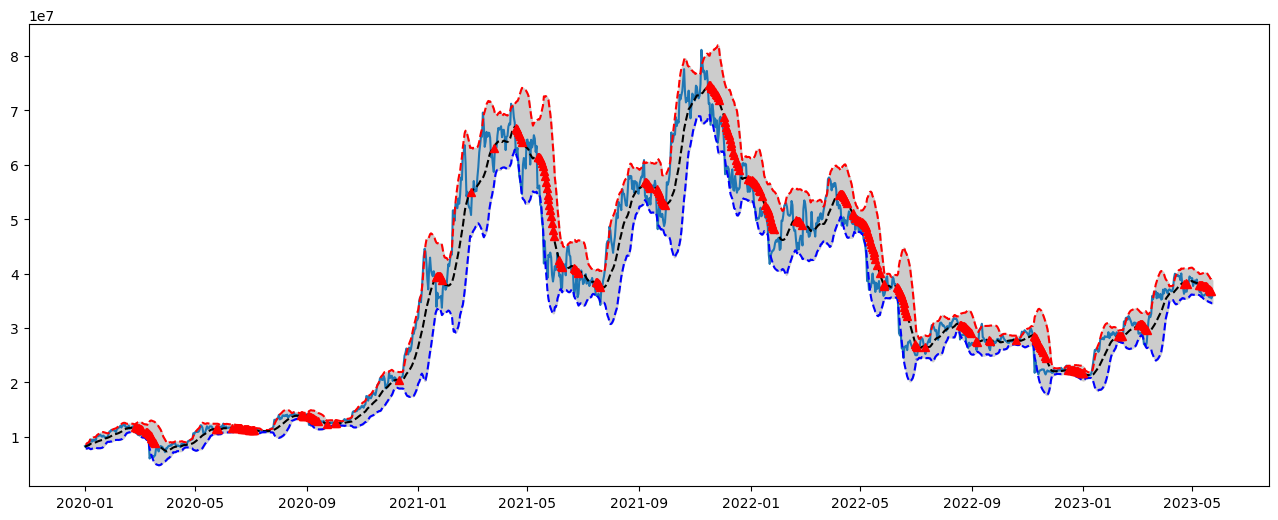

In [17]:
plt.figure(figsize = (16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

In [18]:
bitcoin['bandwidth'].describe()

count    1238.000000
mean        0.236227
std         0.148270
min         0.033746
25%         0.132399
50%         0.207370
75%         0.289834
max         0.862620
Name: bandwidth, dtype: float64

In [19]:
buy_cond2 = bitcoin['bandwidth'] > 0.291745
# sell_cond2 = bitcoin['%b'] < 0.80

In [20]:
BUY_DATE = bitcoin[buy_cond1 & buy_cond2].index
SELL_DATE = bitcoin[sell_cond1].index

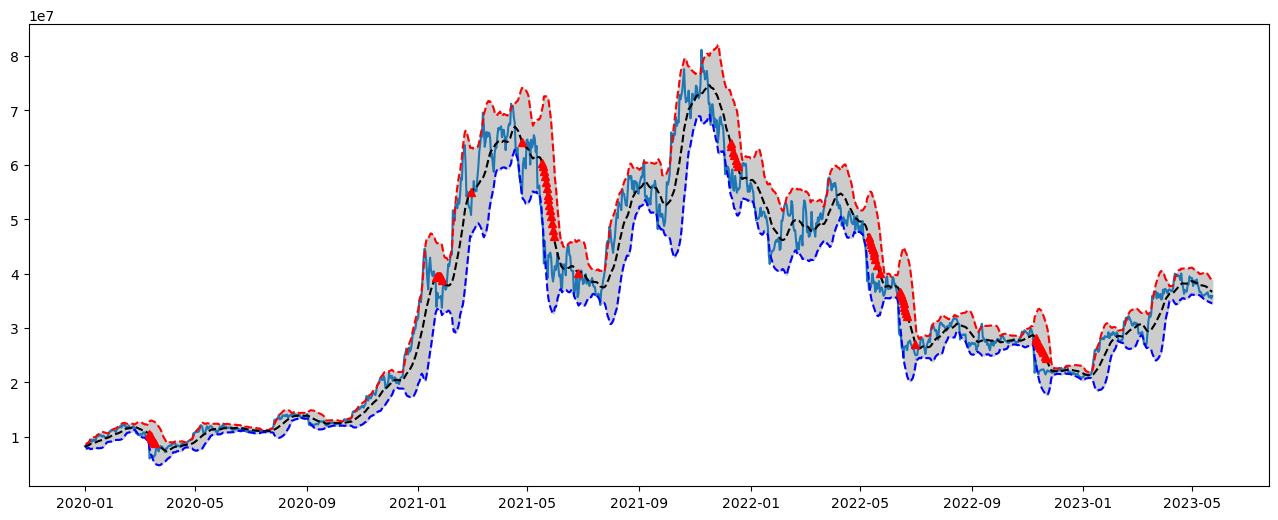

In [21]:
plt.figure(figsize = (16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

In [22]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth
Date,,,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,21442786101341,8315985.50,NaN,NaN,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,24073835152756,8200065.00,163936.343257,8.527938e+06,7.872192e+06,0.323223,0.079968
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,32774051275895,8321079.00,239521.871461,8.800123e+06,7.842035e+06,0.752616,0.115140
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,21503438108393,8400756.25,252271.694691,8.905300e+06,7.896213e+06,0.736879,0.120119
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,22998351377088,8448842.60,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282


In [23]:
MA5_bw = bitcoin['bandwidth'].rolling(5, min_periods = 1).mean()
MA30_bw = bitcoin['bandwidth'].rolling(30, min_periods = 1).mean()

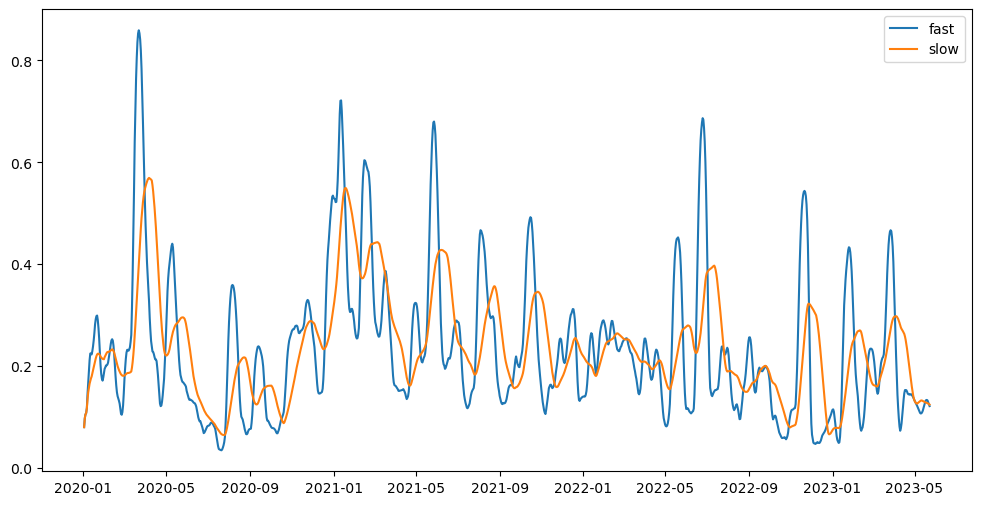

In [24]:
plt.figure(figsize = (12, 6))
plt.plot(bitcoin.index, MA5_bw, label = 'fast')
plt.plot(bitcoin.index, MA30_bw, label = 'slow')
plt.legend()

In [25]:
signal_cond = MA5_bw > MA30_bw

In [26]:
import numpy as np
import pandas as pd
check = np.where(signal_cond, 'pos', 'neg')
bitcoin['CHECK'] = check
check_cond = bitcoin['CHECK'] != bitcoin['CHECK'].shift(1)
BUY = np.where((MA5_bw > MA30_bw) & check_cond, True, None)
SELL = np.where((MA5_bw < MA30_bw) & check_cond, True, None)

In [27]:
bitcoin['BUY'] = BUY
bitcoin['SELL'] = SELL

In [28]:
BUY_DATE = bitcoin[bitcoin['BUY'] == True].index
SELL_DATE = bitcoin[bitcoin['SELL'] == True].index

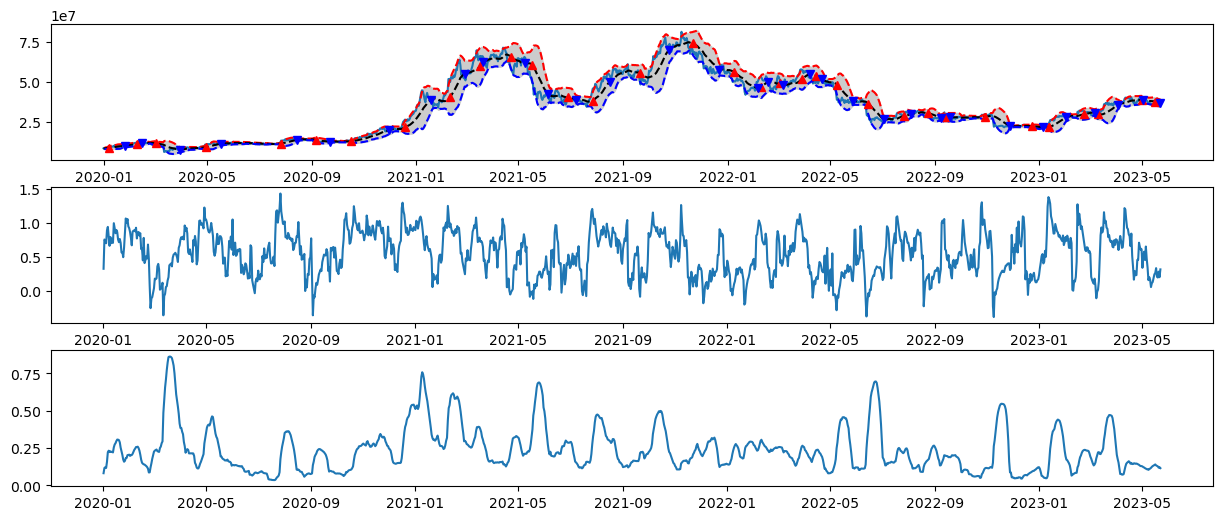

In [29]:
plt.figure(figsize = (15,6))
plt.subplot(3,1,1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

plt.subplot(3,1,2)
plt.plot(bitcoin.index, bitcoin['%b'])

plt.subplot(3,1,3)
plt.plot(bitcoin.index, bitcoin['bandwidth'])

In [30]:
BUY

array([None, None, None, ..., None, None, None], dtype=object)

# MFI
- MF(money flow) = 거래량 X (고가 + 종가 + 저가)/3
- MFR = 양의 MF/음의 MF
- MFI = 100 -(100/(1 + MFR))

In [31]:
bitcoin['MF'] = bitcoin['Volume'] * (bitcoin['High'] + bitcoin['Low'] + bitcoin['Close'])/3
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth,CHECK,BUY,SELL,MF
Date,,,,,,,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,21442786101341,8315985.50,NaN,NaN,NaN,NaN,NaN,neg,None,None,1.785509e+20
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,24073835152756,8200065.00,163936.343257,8.527938e+06,7.872192e+06,0.323223,0.079968,neg,None,None,1.961711e+20
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,32774051275895,8321079.00,239521.871461,8.800123e+06,7.842035e+06,0.752616,0.115140,neg,None,None,2.755684e+20
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,21503438108393,8400756.25,252271.694691,8.905300e+06,7.896213e+06,0.736879,0.120119,neg,None,None,1.850797e+20
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,22998351377088,8448842.60,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282,neg,None,None,1.998222e+20


In [32]:
bitcoin['SELL_MF'] = np.where(bitcoin['Open'] > bitcoin['Close'], bitcoin['MF'], 0)
bitcoin['BUY_MF'] = np.where(bitcoin['Open'] <= bitcoin['Close'], bitcoin['MF'], 0)

In [33]:
print(bitcoin['SELL_MF'].sum())
print(bitcoin['BUY_MF'].sum())
print(bitcoin['SELL_MF'].sum() + bitcoin['BUY_MF'].sum())
print(bitcoin['MF'].sum())

9.473515170718591e+23
9.263668616018653e+23
1.8737183786737243e+24
1.8737183786737243e+24


In [34]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth,CHECK,BUY,SELL,MF,SELL_MF,BUY_MF
Date,,,,,,,,,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,21442786101341,8315985.50,NaN,NaN,NaN,NaN,NaN,neg,None,None,1.785509e+20,0.000000e+00,1.785509e+20
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,24073835152756,8200065.00,163936.343257,8.527938e+06,7.872192e+06,0.323223,0.079968,neg,None,None,1.961711e+20,1.961711e+20,0.000000e+00
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,32774051275895,8321079.00,239521.871461,8.800123e+06,7.842035e+06,0.752616,0.115140,neg,None,None,2.755684e+20,0.000000e+00,2.755684e+20
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,21503438108393,8400756.25,252271.694691,8.905300e+06,7.896213e+06,0.736879,0.120119,neg,None,None,1.850797e+20,0.000000e+00,1.850797e+20
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,22998351377088,8448842.60,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282,neg,None,None,1.998222e+20,0.000000e+00,1.998222e+20


In [35]:
bitcoin['MFR'] = bitcoin['BUY_MF'].rolling(20, min_periods = 5).sum() / bitcoin['SELL_MF'].rolling(20, min_periods = 5).sum()
bitcoin = bitcoin.dropna(axis = 0, subset = ['SELL_MF', 'MFR'])

In [36]:
# MFI = 100 -(100/(1 + MFR))
bitcoin['MFI'] = 100 - (100/ (1 + bitcoin['MFR']))

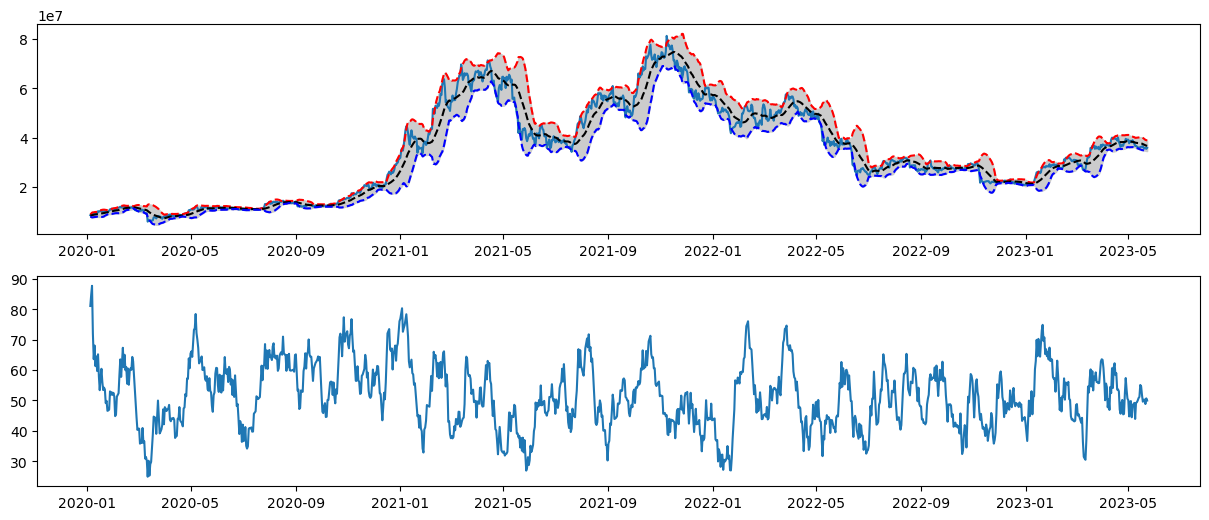

In [37]:
plt.figure(figsize = (15,6))
plt.subplot(2,1,1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
# plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

plt.subplot(2,1,2)
plt.plot(bitcoin.index, bitcoin['MFI'])

In [38]:
buy_cut = 70
sell_cut = 35
buy_index = bitcoin[bitcoin['MFI'] > buy_cut].index
sell_index = bitcoin[bitcoin['MFI'] <= sell_cut].index

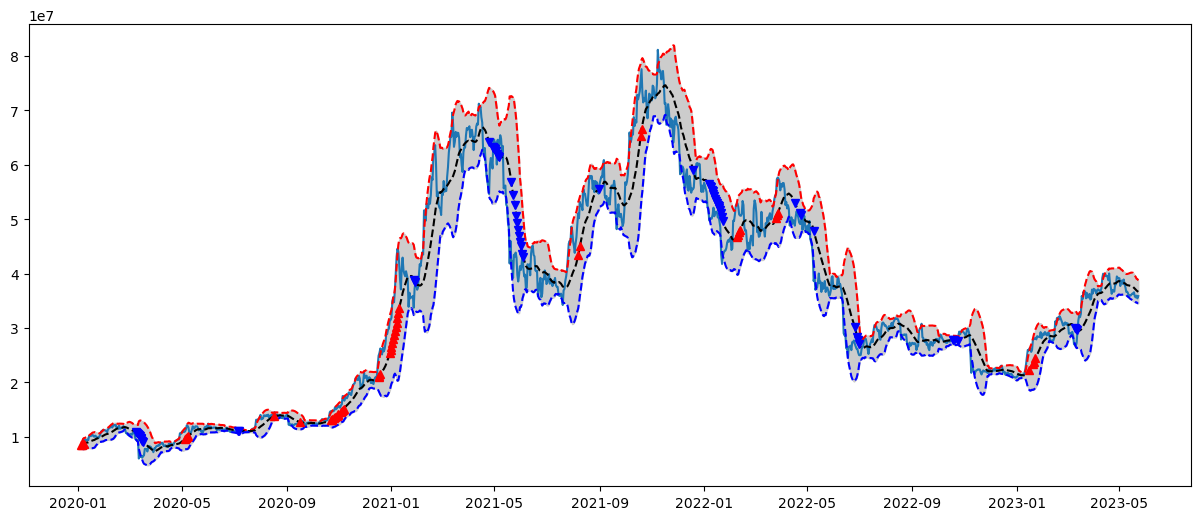

In [39]:
plt.figure(figsize = (15,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.plot(buy_index, bitcoin.loc[buy_index, 'MA20'], 'r^')
plt.plot(sell_index, bitcoin.loc[sell_index, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

In [40]:
def MFI_trading(ticker, start_year, mfi_low, mfi_high):
    bitcoin = fdr.DataReader(ticker, start_year)
    bitcoin['std'] = bitcoin['Close'].rolling(20, min_periods = 1).std()
    bitcoin['MA20'] = bitcoin['Close'].rolling(20, min_periods = 1).mean()
    bitcoin['upper'] = bitcoin['MA20'] + bitcoin['std'] * 2
    bitcoin['lower'] = bitcoin['MA20'] - bitcoin['std'] * 2
    bitcoin['MF'] = bitcoin['Volume'] * (bitcoin['High'] + bitcoin['Low'] + bitcoin['Close'])/3
    bitcoin['SELL_MF'] = np.where(bitcoin['Open'] > bitcoin['Close'], bitcoin['MF'], 0)
    bitcoin['BUY_MF'] = np.where(bitcoin['Open'] <= bitcoin['Close'], bitcoin['MF'], 0)
    bitcoin['MFR'] = bitcoin['BUY_MF'].rolling(20, min_periods = 5).sum() / bitcoin['SELL_MF'].rolling(20, min_periods = 5).sum()
    bitcoin = bitcoin.dropna(axis = 0, subset = ['SELL_MF', 'MFR'])
    bitcoin['MFI'] = 100 - (100/ (1 + bitcoin['MFR']))
    buy_cut = mfi_high
    sell_cut = mfi_low
    buy_index = bitcoin[bitcoin['MFI'] > buy_cut].index
    sell_index = bitcoin[bitcoin['MFI'] <= sell_cut].index

    plt.figure(figsize = (15,6))
    plt.plot(bitcoin.index, bitcoin['Close'])
    plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
    plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
    plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
    plt.plot(buy_index, bitcoin.loc[buy_index, 'MA20'], 'r^')
    plt.plot(sell_index, bitcoin.loc[sell_index, 'MA20'], 'bv')
    plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

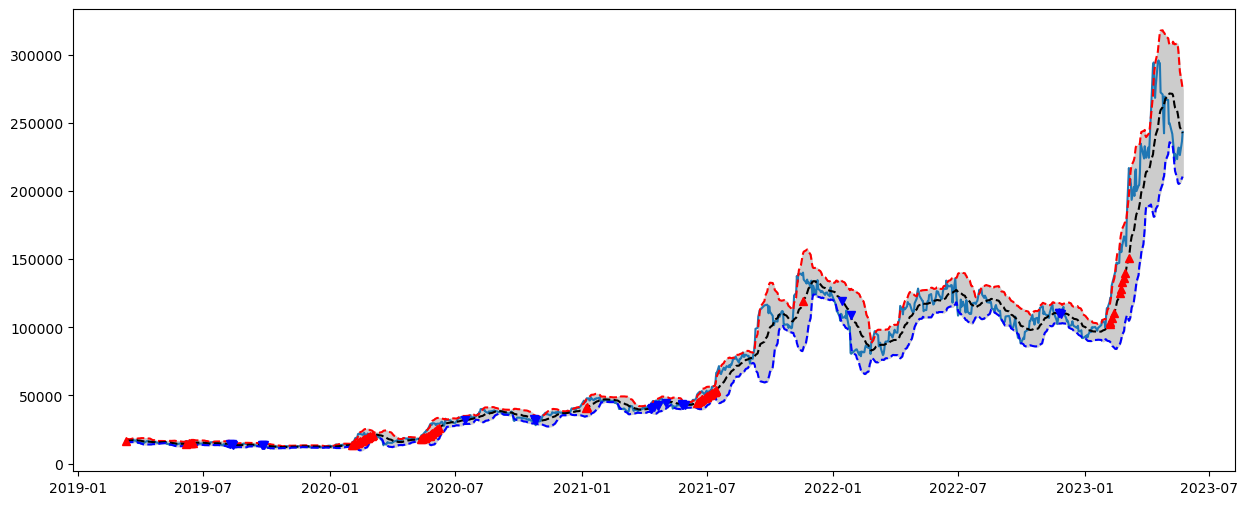

In [41]:
MFI_trading('247540', '2019', 30, 70)